# Tutorial 6: Derivatives

In this exercise, we will compare the results from computing derivatives in two ways: **analytically** and **numerically**. For this purpose, we'll use a physical potential and also do some physics analysis.

## Problem
The energy of a particle in a field has the form 

$$
V(r) = A \, \exp(-\alpha r)\,\sin(\beta r)+\frac{B}{r^{2}},
$$

where $r$ is the distance from the center of the field, and $A$, $B$, $\alpha$ and $\beta$ are real constants.

### Activities to do

(a) Create a python function to compute this potential as a function of $r$.

(b) Then, create an appropiate vector for $r$ and plot this potential $V(r)$ vs $r$.

(c) Compute the force $F(r)$ as a function of $r$ using both the **analytical expression** and the **numerical derivative**. Compare results.

(d) Find the maximum possible value if the attractive force $F(r)_{\rm max}$ and the distance $r_{\rm max}$ at which the particle would be subject to this force.

### (a) Create a python function to compute this potential as a function of $r$.

In [1]:
# Libraries
import sympy as sp 
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Comment it if you do not have it
import scienceplots

In [2]:
# Potential V(r)
def v(r_array, A, B, alpha, beta, use_simpy = True):
    """
    Return the potential using simpy functions by default. 

    Parameters
    ----------
    r_array: float, array, required
        Position array. 
    A, B, alpha, beta: float, required
        Real constants that define the potential.
    use_sympy: bool, optional
        If False, it uses numpy functions.
    """
    # Potential with simpy
    if use_simpy:

        # Set the variable r as global to define it as a symbol
        global r
        r = sp.Symbol('r')

        # Get it
        v_r = A*sp.exp(-alpha*r)*sp.sin(beta*r)+B/r**2

    # With numpy
    else:
        v_r = A*np.exp(-alpha*r_array)*np.sin(beta*r_array)+B/r_array**2
        
    return v_r

The function above could be splitted into two smaller ones, and it would be fine; I did it that way because I like using conditionals. Both return options will be used.

### (b) Then, create an appropiate vector for $r$ and plot this potential $V(r)$ vs $r$.

In [3]:
# Define the position vector 
r_array = np.linspace(0.1, 50, 1000)

# Define the parameters (you might change these)
A, B, alpha, beta = 6, 12, 0.2, 1.5

# Call the function (using numpy for easy plotting)
v_array = v(r_array, A, B, alpha, beta, use_simpy = False)

In [4]:
# Set the style for plots (comment it if you do not have it)
plt.style.use(['science', 'notebook', 'no-latex'])

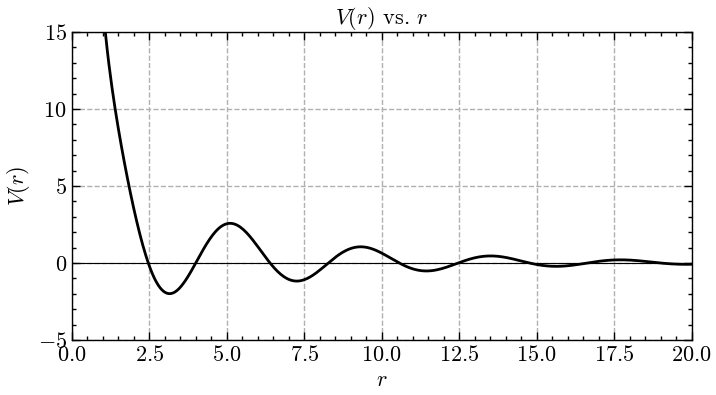

In [22]:
# Plot! 
plt.figure(figsize = (8, 4))

plt.plot(r_array, v_array, color = 'k')
plt.axhline(y = 0, color = 'k', lw = 0.8)

plt.title(r'$V(r)$ vs. $r$')
plt.xlabel(r"$r$")
plt.ylabel(r'$V(r)$')
plt.xlim(0, 20)
plt.ylim(-5, 15)
plt.grid(ls = '--')

plt.show()
plt.close()

### (c) Compute the force $F(r)$ as a function of $r$ using both the analytical expression and the numerical derivative. Compare the results.

#### Analytically

We'll use the `sympy` version for this. 

Notice we do not need to use the `use_sympy` parameter when calling the function because it is set *by default* above.

In [6]:
# Convert the python function into a symbolic expression 
v_symbolic = sp.simplify(v(r_array, A, B, alpha, beta))

# See it
v_symbolic

6*exp(-0.2*r)*sin(1.5*r) + 12/r**2

---
Remember the relation between the force and potential is
$$
F(r) =- \frac{\partial V(r)}{\partial r}.
$$
Roughly speaking, the force is due to the system trying to get restored from the effects of $V(r)$.

---

In [7]:
# Compute the force given the potential (r was defined globally as a symbol above)
force_symbolic = - sp.diff(v_symbolic, r)

# See it too
force_symbolic

1.2*exp(-0.2*r)*sin(1.5*r) - 9.0*exp(-0.2*r)*cos(1.5*r) + 24/r**3

Now we need to feed the expression with `r_array` because we'll be making comparisons via plotting.

##### First way of feeding

In [8]:
# Create a numpy-compatible function
force_numpy = sp.lambdify(r, force_symbolic, 'numpy')

In [9]:
# And feed it
force_sym_1 = force_numpy(r_array)

##### Second way of feeding

In [10]:
# For loop + .subs()
force_sym_2 = [force_symbolic.subs(r, i) for i in r_array]

As you might notice, the second way is much slower. This is because the loop appends the values one by one, while the first way does them all at the same time!

Comment: If you do not find it that different, try increasing the number of elements in `r_array` to $10000$ (or more) and rerun the cells above. 

#### Numerically

We are going to use central and forward differences.

##### Central method

In [11]:
# Simply
force_num_central = - np.gradient(v_array, r_array, axis = 0)

##### Forward method

In [12]:
# Define spacing (both are the same) 
h = abs(r_array[21] - r_array[20])
h = abs(np.diff(r_array)[21]) # 21 can be changed

In [13]:
# This changes the shape by 1
force_num_forward = -np.diff(v_array) / h

# This does not
v_array_h = v(r_array + h, A, B, alpha, beta, use_simpy=False)
force_num_forward = -(v_array_h-v_array) / h

Use any of them, just keep the resulting shape in mind.

##### Root of the force
To do it, we'll make use of the function `opt.fsolve`. 

No need to change anything in the variable `force_numpy` because the function assumes the input expression has the form $f(x)=0$.

In [24]:
# 3 is a good guess in my case, yours might be different
root = opt.fsolve(force_numpy, 3)

# Print it
print(root)

[3.15882498]


In [25]:
# Evaluate the potential at that point
v_0 = v(root[0], A, B, alpha, beta, use_simpy=False)

In the plot, you may uncomment the first two lines, and replace `0` by `v_0` in the scatter plot of the root to compare them to the potential.

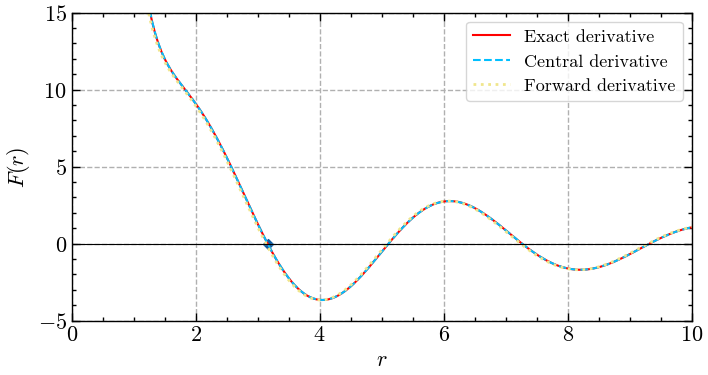

In [26]:
# Plotting!
plt.subplots(figsize = (8, 4))

# Potential
# plt.plot(r_array, v_array, color = 'k', label = 'Potential')
# plt.axvline(root[0], color = 'k', ls = '-.', lw = 0.7)

# Root
plt.scatter(root[0], 0, marker = 'D', s = 25)

# Forces
plt.plot(r_array, force_sym_1, color = 'red', label = 'Exact derivative', linewidth = 1.5)
plt.plot(r_array, force_num_central, color = 'deepskyblue', linestyle = '--', label = 'Central derivative', linewidth = 1.5)
plt.plot(r_array, force_num_forward, color = 'khaki', linestyle = ':', label = 'Forward derivative')

# y-axis
plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)

# Labels and stuff
plt.xlabel(r"$r$")
plt.ylabel(r'$F(r)$')
plt.xlim(0, 10)
plt.ylim(-5, 15)
plt.grid(ls = '--')

# Uncomment to see the derivatives closely
# plt.xlim(root[0] - 0.1, root[0] + 0.1)
# plt.ylim(-0.30, 0.30)

plt.legend(frameon = True, fontsize = 13)
plt.show()
plt.close()

### (d) Find the maximum possible value of the attractive force $F(r)_{max}$ and the distance $r_{max}$ at which the particle would be subject to this force.

To find the maximum value of the **attractive** force, we just need to find the minimum point where its derivative (the negative second derivative of the potential) is equal to $0$.

We'll use the analytic approach, and find the minimum by guessing.

In [27]:
# Find the derivative
force_derivative = sp.diff(force_symbolic)

# See it
force_derivative

13.26*exp(-0.2*r)*sin(1.5*r) + 3.6*exp(-0.2*r)*cos(1.5*r) - 72/r**4

In [29]:
# Lambdify it to be able to find the root
force_derivative_numpy = sp.lambdify(r, force_derivative, 'numpy')

# Find it with guess = 4
r_max = opt.fsolve(force_derivative_numpy, 4)

# Evaluate it
f_max = force_symbolic.subs(r, r_max[0])

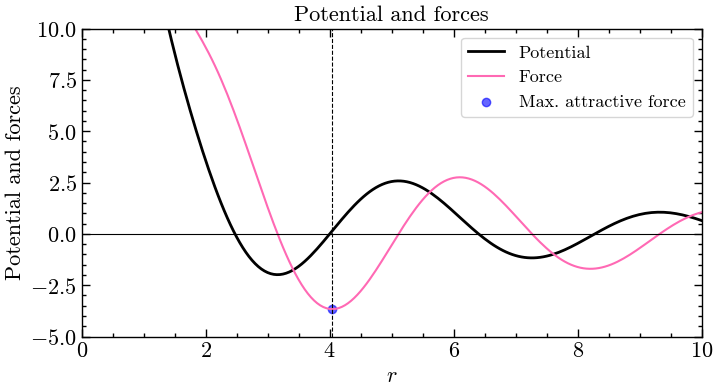

In [30]:
# Plot!
plt.figure(figsize = (8,4))

# Potential
plt.plot(r_array, v_array, color = 'k', label = 'Potential')

# Force (you could use any of the three above)
plt.plot(r_array, force_num_central, color = 'hotpink', label = 'Force', linewidth = 1.5)
plt.scatter(r_max, f_max, alpha = 0.6, color = 'b', label = 'Max. attractive force')
plt.axvline(r_max, ls = '--', color = 'k', lw = '0.8')

# y = 0
plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth = 0.8)

# Labels and other stuff
plt.title("Potential and forces")
plt.xlabel(r"$r$")
plt.ylabel("Potential and forces")
plt.xlim(0, 10)
plt.ylim(-5, 10)
plt.legend(frameon = True, fontsize = 13)
# plt.grid(ls = '--')

plt.show()
plt.close()

In [31]:
# Print them too!
print(f"r_max: +{round(r_max[0], 3)}")
print(f"F_max: {round(f_max, 3)}")

r_max: +4.041
F_max: -3.667


That's it :)